In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")
datasdp.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [3]:
datasdp.describe()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,6.686454,1.592085,3.709285,6.686454,338.796043,0.235921,134.684170,21.424658,31.296804,11.816591,1.359209,7.687215,1.442161,1.368341,0.093607,0.444444,2.522070,0.432268
std,8.933145,1.100217,18.917807,8.933145,3015.686597,1.356170,310.092242,43.409342,92.515717,26.683368,13.170233,17.638376,6.002672,3.687500,1.557598,3.898996,6.215467,0.495580
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,12.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,4.000000,3.000000,0.000000,44.000000,8.000000,7.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.000000,2.000000,2.000000,8.000000,22.000000,0.000000,121.000000,23.750000,24.000000,11.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000
max,134.000000,10.000000,405.000000,134.000000,64947.000000,18.000000,4133.000000,545.000000,1758.000000,374.000000,366.000000,315.000000,87.000000,58.000000,54.000000,123.000000,116.000000,1.000000


In [5]:
datasdp.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [6]:
datasdp.tail()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
1309,4,2,0,4,1,0,8,3,2,2,0,2,0,0,0,0,0,1
1310,5,2,0,5,0,0,22,3,1,1,0,1,0,0,0,0,0,1
1311,6,2,2,6,80,0,105,30,19,17,0,14,3,0,0,0,1,1
1312,12,7,7,12,108,12,358,36,43,16,5,7,4,0,1,0,0,1
1313,4,1,9,4,3,0,5,0,3,3,0,0,0,0,0,0,0,1


In [8]:
datasdp.sample(5)

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
347,3,1,0,3,6,0,42,8,4,4,0,4,0,0,0,0,0,0
352,2,1,1,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0
703,1,1,0,1,0,0,14,2,1,1,0,1,0,0,0,0,0,0
455,4,1,3,4,0,0,94,18,24,13,0,12,1,1,0,0,2,0
950,1,1,0,1,0,0,7,2,2,1,0,1,0,0,0,0,0,1


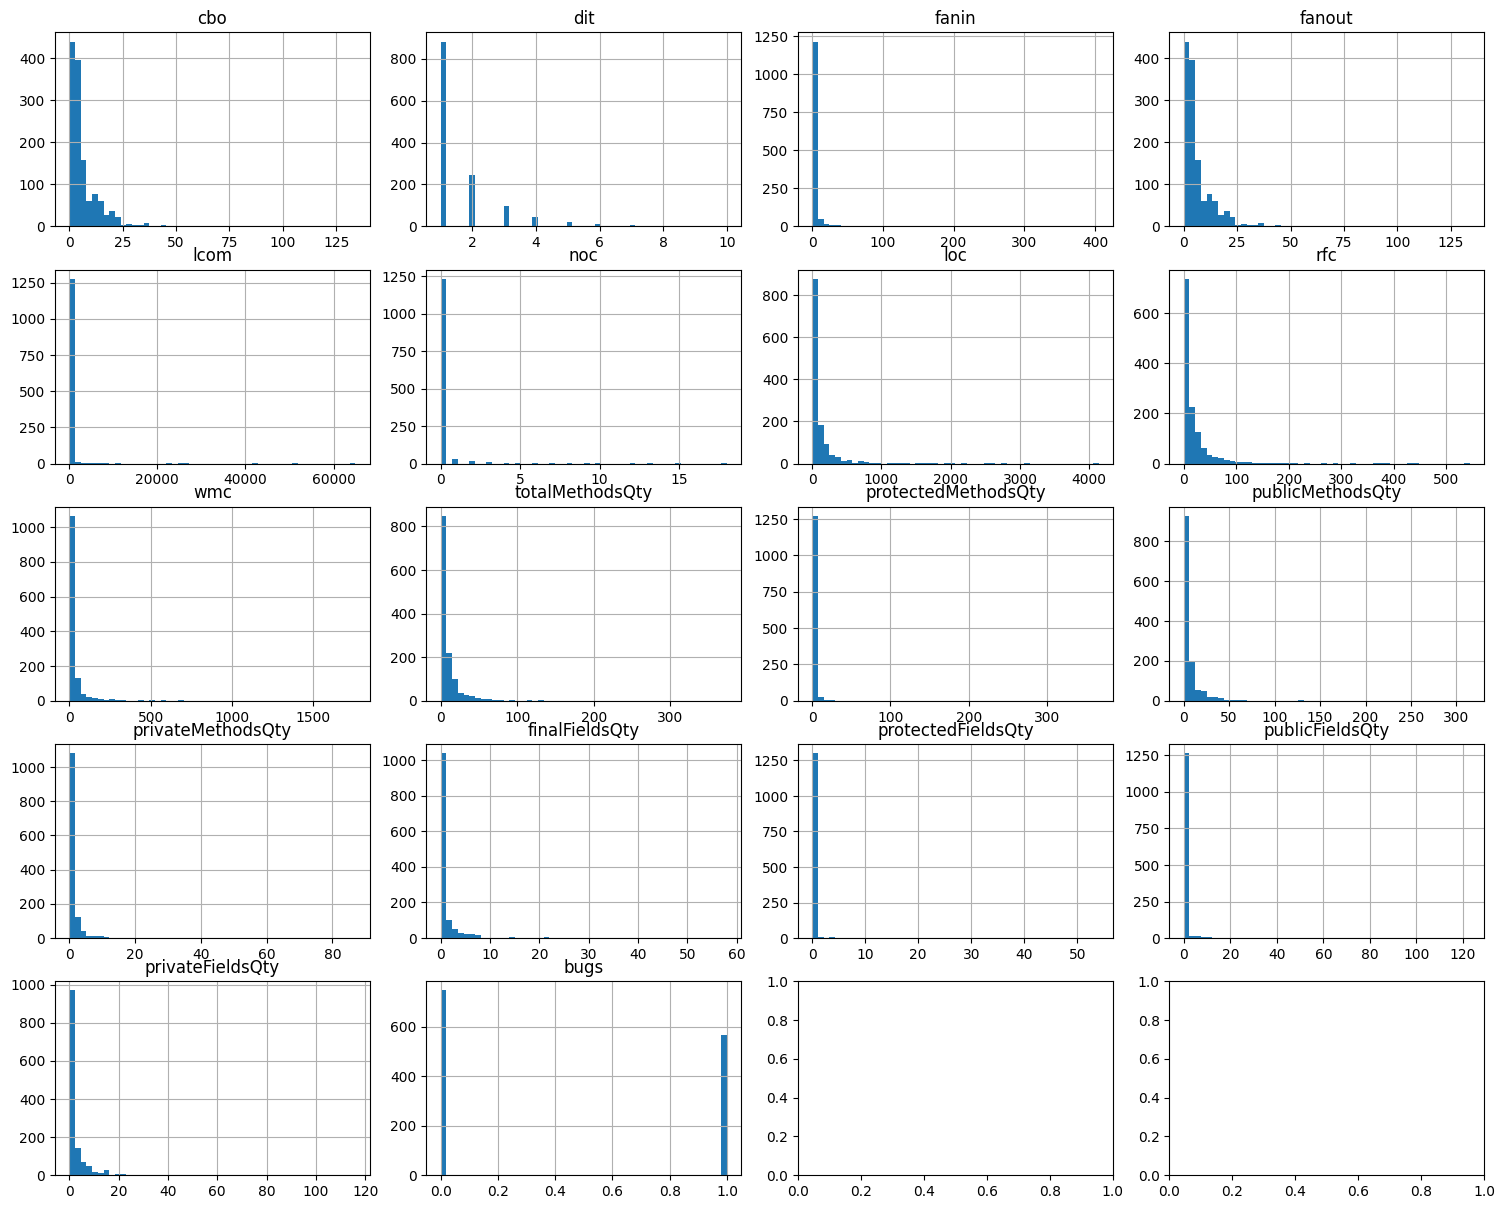

In [10]:
#Data Exploration
import matplotlib.pyplot as plt
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.tight_layout(pad=1.0)
axe = axes.ravel()

for i, feature in enumerate(datasdp.columns):
    axe[i].set_title(feature)
    datasdp[feature].hist(bins=50, ax=axe[i])

plt.show()


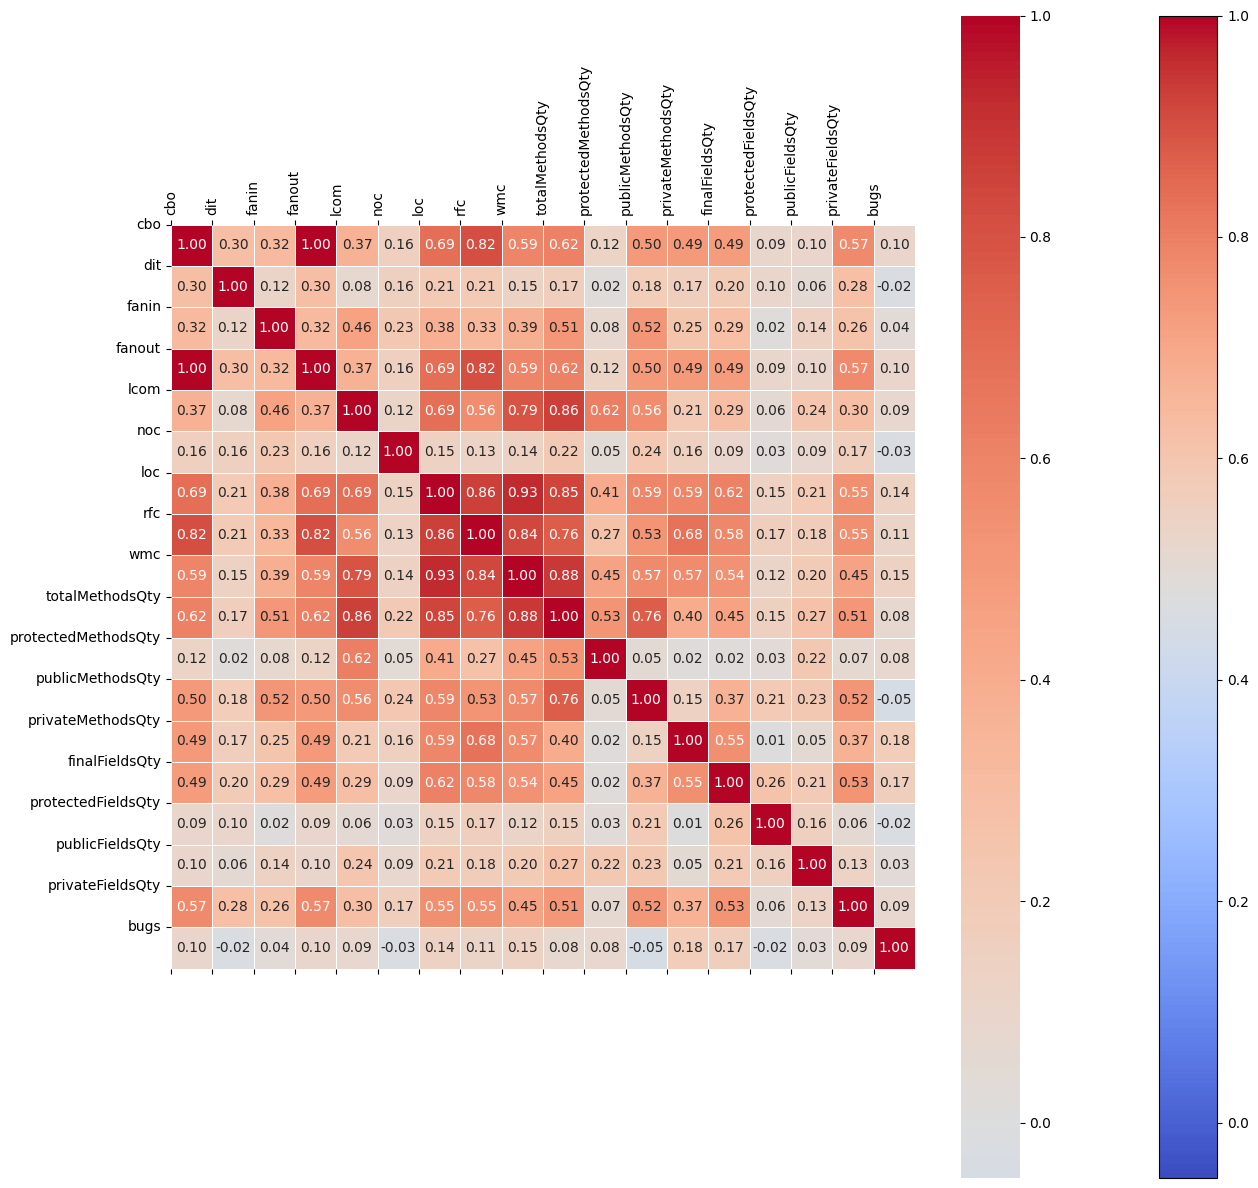

In [11]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = datasdp.corr()

# Heatmap to visualize the correlations
plt.figure(figsize=(15, 15))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()
     

In [12]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

counts_training = y_train.value_counts()
print("data distribiution data training: ", counts_training)
counts_testing = y_train_base.value_counts()
print("data distribiution data testing: ", counts_testing)

data distribiution data training:  bugs
0    593
1    458
Name: count, dtype: int64
data distribiution data testing:  bugs
0    286
1    239
Name: count, dtype: int64


Validation roc auc score:  0.8391859774212715
validation accuracy :  0.844106463878327
validation recall :  0.8090909090909091
validation f1-score :  0.8127853881278538
validation precision :  0.8165137614678899


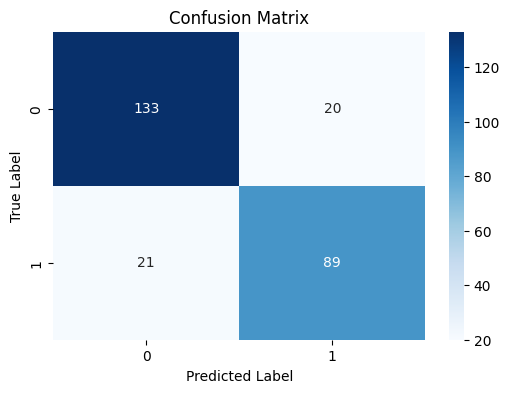

In [32]:
#random forest
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_leaf=1,
    criterion='entropy')

rf_model.fit(X_train_base, y_train_base)
predictions_rf = rf_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Validation roc auc score:  0.6142008318478906
validation accuracy :  0.6730038022813688
validation recall :  0.2545454545454545
validation f1-score :  0.39436619718309857
validation precision :  0.875


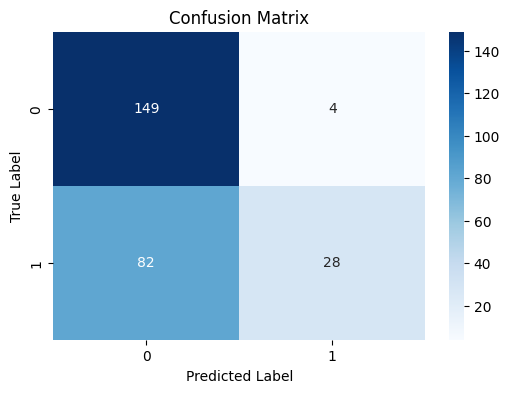

In [35]:
#2. extra trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

et_model = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_leaf=1,
    criterion='gini'
)

et_model.fit(X_train_base, y_train_base)
predictions_rf = et_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation roc auc score:  0.7565062388591801
validation accuracy :  0.7642585551330798
validation recall :  0.7090909090909091
validation f1-score :  0.7155963302752294
validation precision :  0.7222222222222222


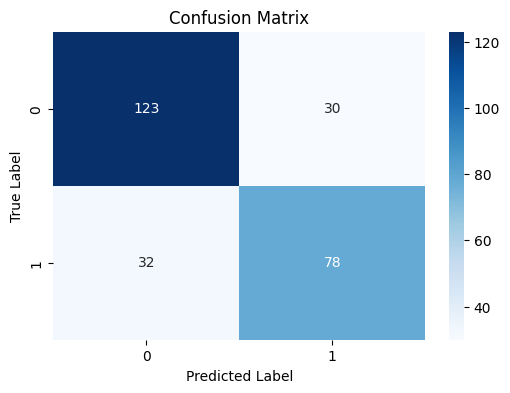

In [11]:
#3. Adapative Boosting (AdaaBoost) using smote technique

from sklearn.ensemble  import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=5000,
    random_state=1
)
   

adaboost_model.fit(X_train_base, y_train_base)
predictions_rf = adaboost_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Validation roc auc score:  0.8469994058229353
validation accuracy :  0.8517110266159695
validation recall :  0.8181818181818182
validation f1-score :  0.821917808219178
validation precision :  0.8256880733944955


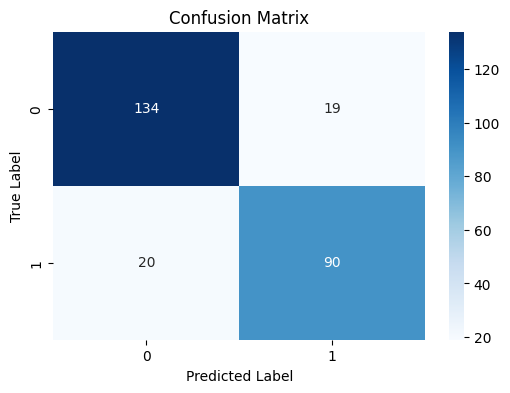

In [12]:
#4. Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    min_samples_leaf=2,
    max_depth=5,
    loss='exponential',
    random_state=1
)
   

gb_model.fit(X_train_base, y_train_base)
predictions_rf = gb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Validation roc auc score:  0.8366310160427808
validation accuracy :  0.844106463878327
validation recall :  0.7909090909090909
validation f1-score :  0.8093023255813954
validation precision :  0.8285714285714286


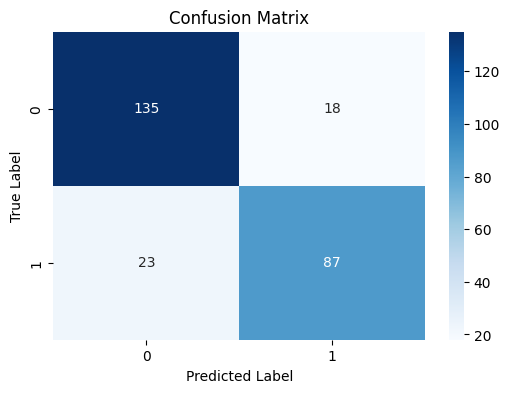

In [15]:
#5. Histogram Gradient Boosting

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

hgb_model = HistGradientBoostingClassifier(
    max_iter=100,
    learning_rate=0.1,
    min_samples_leaf=2,
    max_depth=5,
    random_state=1
)
   

hgb_model.fit(X_train_base, y_train_base)
predictions_rf = hgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Validation roc auc score:  0.8320855614973262
validation accuracy :  0.8403041825095057
validation recall :  0.7818181818181819
validation f1-score :  0.8037383177570093
validation precision :  0.8269230769230769


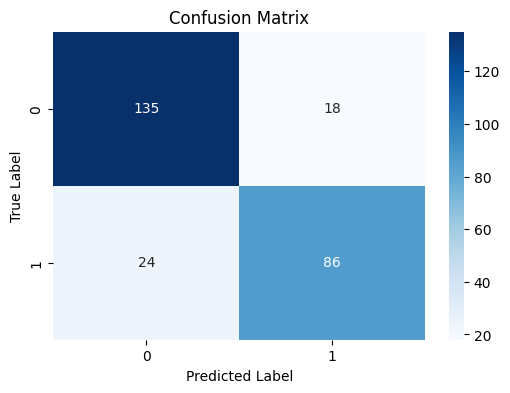

In [17]:
#6. XGBoost 

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=100, 
    max_depth=5, 
    min_child_weight=1, 
    max_delta_step=0, 
    random_state=42)
   

xgb_model.fit(X_train_base, y_train_base)
predictions_rf = xgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Validation roc auc score:  0.8639037433155079
validation accuracy :  0.8669201520912547
validation recall :  0.8454545454545455
validation f1-score :  0.8416289592760181
validation precision :  0.8378378378378378


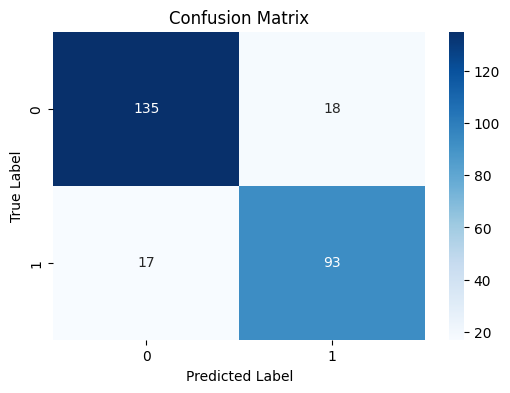

In [ ]:
#7. Categorical Boosting (CatBoost)

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

cb_model = CatBoostClassifier(
    n_estimators=1000,
    loss_function='Logloss',
    learning_rate=0.1,
    depth=6,
    min_data_in_leaf=2,
    random_seed=1,
    logging_level='Silent')
   
cb_model.fit(X_train_base, y_train_base)
predictions_rf = cb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

Validation roc auc score:  0.8827985739750447
validation accuracy :  0.8859315589353612
validation recall :  0.8636363636363636
validation f1-score :  0.8636363636363636
validation precision :  0.8636363636363636


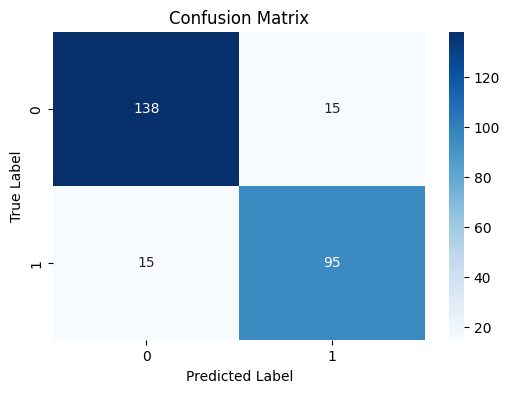

In [21]:
#create stacking ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators_base_model = [
    ('randomforest', rf_model),
    ('extratrees', et_model),
    ('adaboost', adaboost_model),
    ('gradboost', gb_model),
    ('hgboost', hgb_model),
    ('xgboost', xgb_model),
    ('catboost', cb_model), 
]

#stacked model with  base model and logistic
stack = StackingClassifier(estimators=estimators_base_model, final_estimator=LogisticRegression(), passthrough=False)

#train the model
stack.fit(X_train, y_train)

#get prediction from stack
stack_predictors = stack.predict(X_holdout)

#evaluate model
#metrics calculation
roc_auc = roc_auc_score(y_holdout, stack_predictors)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, stack_predictors)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, stack_predictors)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, stack_predictors)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, stack_predictors)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, stack_predictors)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
base_models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]
base_model_preds = []
for model in base_models:
    model.fit(X_train_base, y_train_base)
    pred = model.predict(X_train_meta)
    base_model_preds.append(pred)

stacking_dataset = np.column_stack(base_model_preds)
meta_model = LogisticRegression()
meta_model.fit(stacking_dataset, y_train_meta)